In [ ]:
#import libraries that help with geo stuff. The order matters!
!pip install pandas fiona shapely pyproj rtree

In [ ]:
!pip install geopandas

In [ ]:
import os
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
#import geoplot as gplt
import geopandas as gpd
#import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
#import mapclassify as mc
import numpy as np
from shapely.geometry import Point, Polygon, MultiPolygon

In [ ]:
path = r"/content/drive/MyDrive/dataviz/notebooks/studies/"
drive.mount('/content/drive')
file_list=os.listdir(path)
event_files = []
for f in file_list:
  if 'event' in f:
    event_files.append(f)

print('We have ' + str(len(event_files)) + ' event files')

In [ ]:
df = pd.read_csv(path+event_files[5], dtype = {""})
print(len(df), ' rows in the database')
df.head()

19381  rows in the database


,timestamp,location_lat,location_long,individual_id,tag_id,manually_marked_outlier,manually_marked_valid,algorithm_marked_outlier,individual_local_identifier,individual_taxon_canonical_name,study_id
0,2018-04-13 17:00:47.000,0.914940,15.591150,468273629.0,461701344,NaN,NaN,NaN,COG0223,Hypsignathus monstrosus,439735878
1,2018-04-13 17:00:48.000,0.914932,15.591156,468273629.0,461701344,NaN,NaN,NaN,COG0223,Hypsignathus monstrosus,439735878
2,2018-04-13 17:00:49.000,0.914924,15.591162,468273629.0,461701344,NaN,NaN,NaN,COG0223,Hypsignathus monstrosus,439735878
3,2018-04-13 17:00:50.000,0.914922,15.591164,468273629.0,461701344,NaN,NaN,NaN,COG0223,Hypsignathus monstrosus,439735878
4,2018-04-13 17:00:51.000,0.914918,15.591165,468273629.0,461701344,NaN,NaN,NaN,COG0223,Hypsignathus monstrosus,439735878


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:199: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)


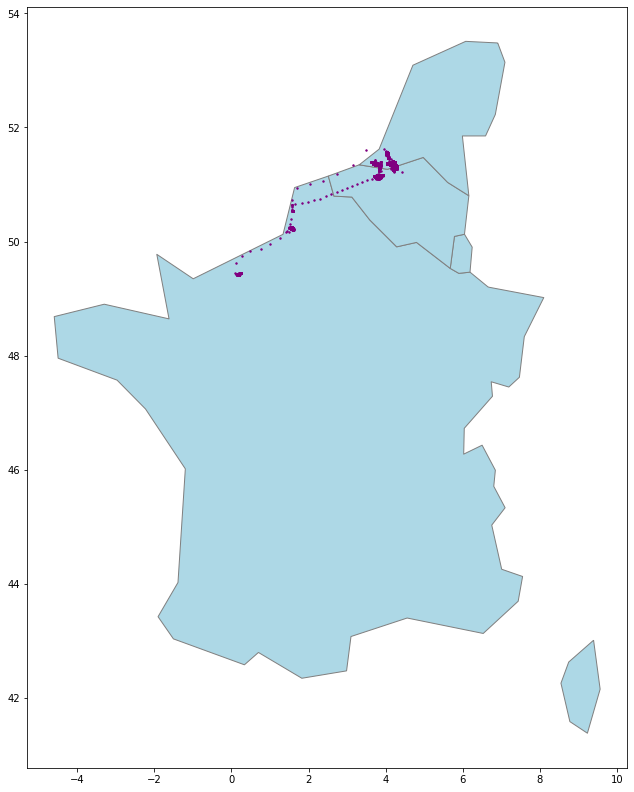

In [ ]:
#get the map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Remove French Guiana from France.
shape = world[world['name'] == 'France']['geometry'].all()
fr_df = pd.Series(['France', 'France'], name='country')
fr_df = gpd.GeoDataFrame(fr_df, geometry=[shape[1], shape[2]])
fr_df = fr_df.dissolve(by='country')
world.at[world['name'] == 'France', 'geometry'] = fr_df['geometry'].values   

#get a map of europe
europe = world[world.continent == 'Europe']

#remove Russia (too big)
europe = europe[europe['name'] != 'Russia']

#restrict the map to some interesting countries
interesting = ['Luxembourg', 'Netherlands', 'Belgium', 'France']
europe.interesting = europe.apply(lambda x: x['name'] in interesting, axis = 1)
section = europe[europe.interesting == True]

fig, ax = plt.subplots(figsize=(24,14))
section.plot(ax = ax, color='lightblue', edgecolor='grey')
ax.scatter(df['location_long'], df['location_lat'], s=2,  color = 'Purple')#c=df['color'], cmap = 'Oranges') 

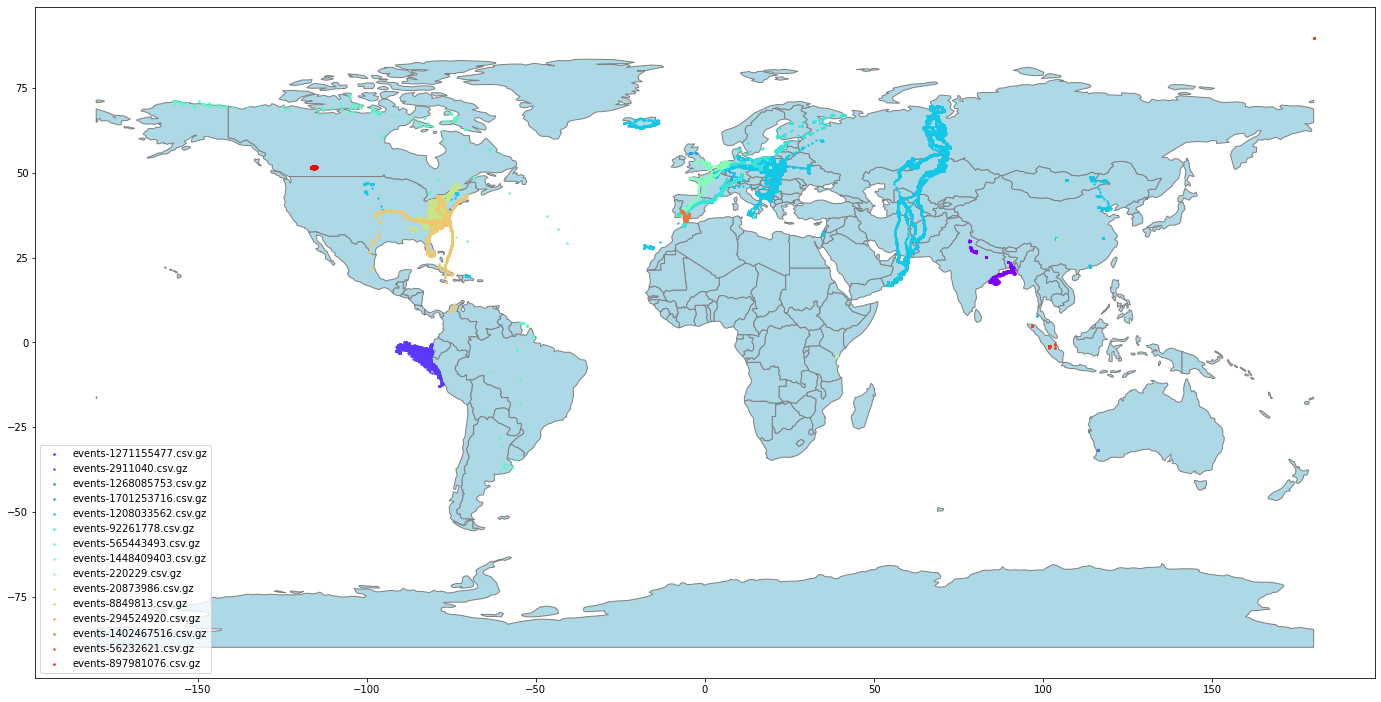

In [ ]:
from matplotlib.pyplot import cm 
fig, ax = plt.subplots(figsize=(24,14))
world.plot(ax = ax, color='lightblue', edgecolor='grey')

n = 15
color = iter(cm.rainbow(np.linspace(0, 1, n)))
for i in range(n):
  print(i)
  c = next(color)
  df = pd.read_csv(path+event_files[i])
  ax.scatter(df['location_long'], df['location_lat'], s=2 , c = c, label = event_files[i])
plt.legend()

In [ ]:
big_one = pd.read_csv(path+event_files[0])
count = 0
for i in range(50):
  print(i)
  new_df = pd.read_csv(path+event_files[i])
  big_one = pd.concat([big_one, new_df])


In [ ]:
len(big_one)

43870473

Let's compute some statistics on this bad boy. Seems that we have about one taxon per name

In [ ]:
pd.unique(big_one.individual_taxon_canonical_name), len(pd.unique(big_one.individual_taxon_canonical_name))

(array([nan, 'Pagophila eburnea', 'Pteropus poliocephalus',
        'Aquila chrysaetos', 'Haliaeetus leucocephalus', 'Asio flammeus',
        'Pandion haliaetus', 'Falco peregrinus', 'Bos taurus',
        'Hypsignathus monstrosus', 'Papio anubis', 'Cervus elaphus',
        'Catharus minimus', 'Rissa tridactyla', 'Rissa', 'Anser anser',
        'Gyps fulvus', 'Gyps africanus', 'Torgos tracheliotus',
        'Eidolon helvum', 'Pelecanus onocrotalus', 'Larus fuscus',
        'Steatornis caripensis', 'Chelonia mydas',
        'Eretmochelys imbricata', 'Anas platyrhynchos', 'Cairina moschata',
        'Homo sapiens', 'Buceros bicornis', 'Rhyticeros undulatus',
        'Myotis daubentoni', 'Struthio camelus', 'Aquila pomarina',
        'Panthera onca', 'Columba livia', 'Haliaeetus albicilla',
        'Connochaetes taurinus', 'Sus scrofa', 'Fregata aquila',
        'Sula leucogaster', 'Sula dactylatra', 'Onychoprion fuscatus',
        'Phalcoboenus australis', 'Necrosyrtes monachus',
        

In [ ]:
pd.unique(big_one.individual_local_identifier)

array([931012.0, 931013.0, 6296615.0, ..., 'Mossimbo', 'Mwasi a Mossimbo',
       'Madame Nguende'], dtype=object)

There are some pretty old data!

In [ ]:
big_one['timestamp'] = pd.to_datetime(big_one['timestamp'])
big_one.timestamp.min(), big_one.timestamp.max()

(Timestamp('1901-12-13 20:46:18'), Timestamp('2022-04-04 22:14:11'))

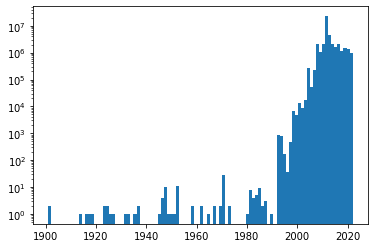

In [ ]:
#most of the data is in the 2000 - 2020
_ = plt.hist(big_one.timestamp.dt.year, bins = 100)
plt.yscale('log')

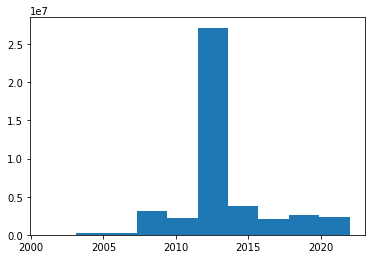

In [ ]:
_ = plt.hist(big_one[big_one.timestamp.dt.year > 2000].timestamp.dt.year)

This means that we might have some giant studies and smaller ones

In [ ]:
#lenghts = []
i = 0
for i in range(125, len(event_files)):
  print(i)
  new_df = pd.read_csv(path+event_files[i])
  lenghts.append(len(new_df))
  del new_df

In [ ]:
len(lenghts), len(event_files)

(370, 373)

In [ ]:
# empty files: 54, 124, 192

In [ ]:
lenghts = np.array(lenghts)
print('total rows :', lenghts.sum())

total rows : 398604455


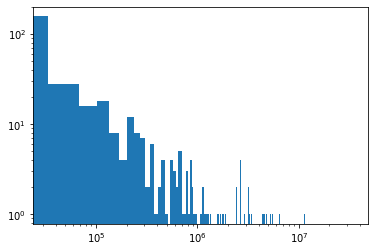

In [ ]:
_ = plt.hist(lenghts, bins = np.linspace(-0.5, lenghts.max()+ 0.5, 1000))
plt.yscale('log')
plt.xscale('log')

We only have a handful of giant events tables, we can also get rid of them

In [ ]:
# import module
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
#can uise the following to find out the geolocation of the event
def get_loc(latitude, longitude):
  
  location = geolocator.reverse(str(latitude)+","+str(longitude)).raw['address']
  #city = location.get('city', '')
  #state = location.get('state', '')
  country = location.get('country', '')
  return country


In [ ]:
geolocator.reverse('81.64'+","+'-16.33').raw['address']

{'country': 'Kalaallit Nunaat', 'country_code': 'gl'}

In [ ]:
df[:10].apply(lambda x: get_loc(x['location_lat'], x['location_long']), axis = 1)

0    Congo
1    Congo
2    Congo
3    Congo
4    Congo
5    Congo
6    Congo
7    Congo
8    Congo
9    Congo
dtype: object

In [ ]:
big_one[500000:500010:].apply(lambda x: get_loc(x['location_lat'], x['location_long']), axis = 1)

132044    Australia
132045    Australia
132046    Australia
132047    Australia
132048    Australia
132049    Australia
132050    Australia
132051    Australia
132052    Australia
132053    Australia
dtype: object

I spent quite some time in trying to find an easy way to predict the country from the coordinates. The one above seems to be the most straight forward, but it takes quite some time